# Loading Dataset

Given Datasets <br>
Dataset 1 => dataset1.csv (WebERP) <br>
Dataset 2 => Advertising.csv <br>
Dataset 3 => fish.csv

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1080x864 with 0 Axes>

In [120]:
data = pd.read_csv("dataset1.csv")
data.head()

,Time,Faults,CDF
0,1,1,1
1,2,6,7
2,3,0,7
3,4,2,9
4,5,0,9


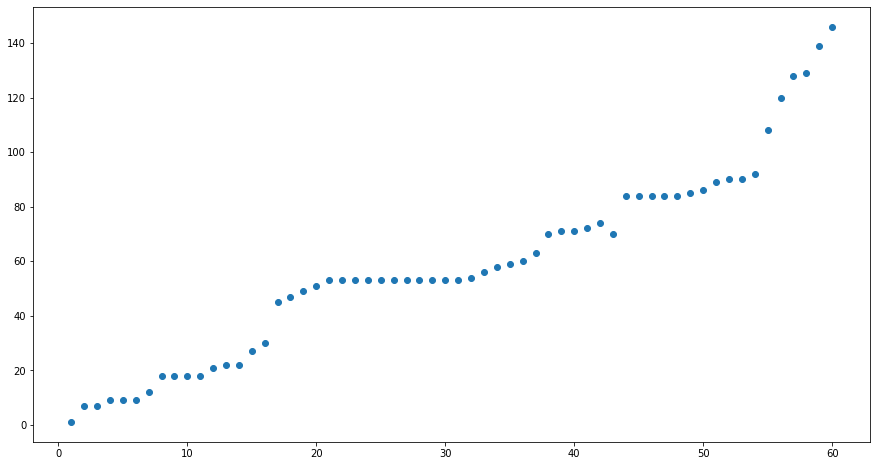

In [109]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

x = data["Time"]
y = data["CDF"]
plt.scatter(x,y)

# The pre-requisite methods needed beforehand for linear curve fitting

In [110]:
def linearEq(x,param):
    return param[0]*x + param[1]

def linearGradient(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return np.array([(-2/n)*sum(x*(y-yHat)), (-2/n)*sum(y-yHat)])

def linearCost(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return (1/n)*sum((y-yHat)**2)

# Defining Optimizers

Gradient Descent

In [124]:
def gradientDescent(param, gradient, cost, learningRate = 0.00001, iterations = 1000, precision = 0.001):
    costVal = []
       
    for it in range(iterations):    
        costVal.append(cost(x,y,param))
        
        stepSize = learningRate*gradient(x,y,param)
        
        if(all(np.abs(stepSize) < precision)): 
            break
        
        param = param - stepSize
            
    return param, np.array([range(it+1),costVal],dtype=object)

RMSProp

In [132]:
def rmsprop(x,y,param, gradFunc, costFunc, learningRate=0.01, decay=0.99, iterations=100, precision=0.0001):
    eps = 1e-8
    costVal = []
    sum_sq_grad = np.array([0.0 for i in np.arange(len(param))])
    
    for it in range(iterations):
        costVal.append(costFunc(x,y,param))
        
        gradient = gradFunc(x,y,param)
        sum_sq_grad = sum_sq_grad*decay + (1-decay)*(gradient)**2
        
        stepSize = (learningRate * gradient) / np.sqrt(sum_sq_grad+eps)
        
        if(all(np.abs(stepSize) < precision)):
            break
        
        param = param - stepSize
    
    return param, np.array([range(it+1),costVal],dtype=object)

Adam

In [113]:
def adam(x,y,param, gradFunc, costFunc, iterations=1000, alpha=0.01, beta1=0.8, beta2=0.999):
    ets = 1e-8
    m = np.array([0.0 for _ in range(len(param))])
    v = np.array([0.0 for _ in range(len(param))])
    costVal = []
    
    for t in range(iterations):
        costVal.append(costFunc(x,y,param))
        
        gradVal = gradFunc(x,y,param)

        m = beta1*m + (1.0-beta1)*gradVal
        v = beta2*v + (1.0-beta2)*(gradVal)**2

        mhat = m / (1.0-beta1**(t+1))
        vhat = v / (1.0-beta2**(t+1))
        
        stepSize = (alpha * mhat) / np.sqrt(vhat+ets)
        
        param = param - stepSize
    
    return param, np.array([range(t+1),costVal],dtype=object)

# Initializing parameters and passing hyperparameters to call optimizer methods

In [126]:
param = np.array([0.0, 0.0])

param1, costVal1 = gradientDescent(param, linearGradient, linearCost, 0.000001, 1000, 0.0000001)
param2, costVal2 = rmsprop(x,y,param, linearGradient, linearCost, 0.01, 0.99, 1000, 0.00001)
param3, costVal3 = adam(x, y, param, linearGradient, linearCost, 1000, 0.01, 0.9, 0.999)

param1,param2,param3

(array([1.75888924, 0.04369365]),
 array([1.91189562, 0.46650374]),
 array([1.88082596, 1.70955421]))

# Plotting best fit line over dataset

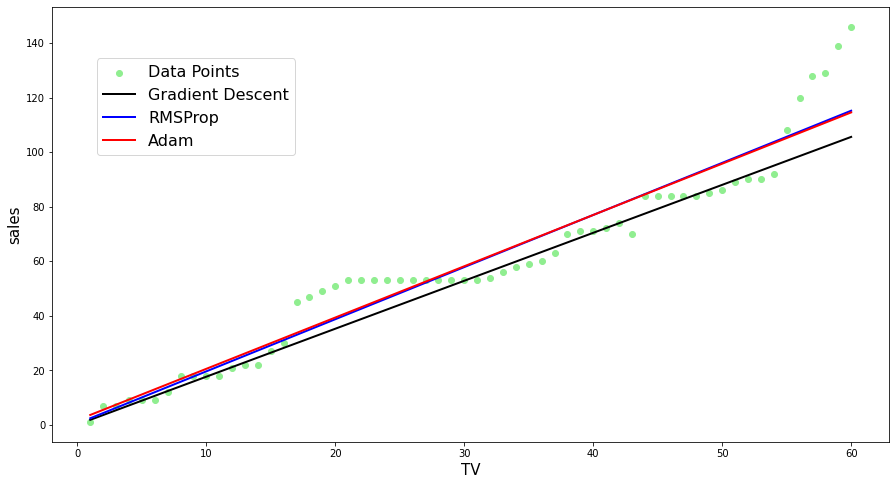

In [127]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.scatter(x,y, c="lightgreen", label="Data Points")
plt.plot(x,linearEq(x,param1),"black", linewidth=2, label="Gradient Descent")
plt.plot(x,linearEq(x,param2),"blue", linewidth=2, label="RMSProp")
plt.plot(x,linearEq(x,param3),"red", linewidth=2, label="Adam")

plt.legend(loc=0, fontsize=16)
plt.xlabel("TV", fontsize=15)
plt.ylabel("sales", fontsize=15)
plt.legend(loc=0, fontsize=16, bbox_to_anchor=(0.3, 0.9))

# Cost vs No. of Iterations

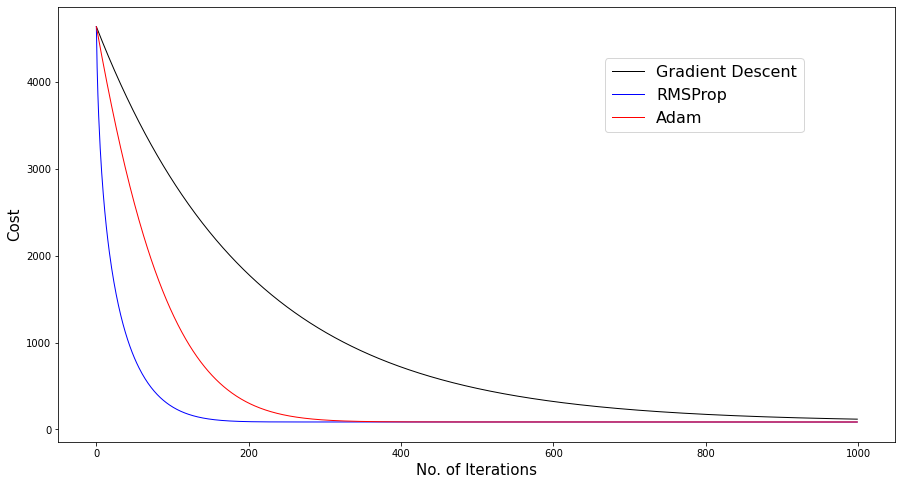

In [128]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(costVal1[0], costVal1[1],"black", linewidth=1, label="Gradient Descent")
plt.plot(costVal2[0], costVal2[1],"blue", linewidth=1, label="RMSProp")
plt.plot(costVal3[0], costVal3[1],"red", linewidth=1, label="Adam")

plt.xlabel("No. of Iterations", fontsize=15)
plt.ylabel("Cost", fontsize=15)
plt.legend(loc=0, fontsize=16, bbox_to_anchor=(0.9, 0.9))

In [129]:
costVal1

array([[0, 1, 2, ..., 997, 998, 999],
       [4636.25, 4613.867553684442, 4591.5951759890695, ...,
        118.17026294948823, 118.0060672679516, 117.8426790402213]],
      dtype=object)

In [130]:
costVal2

array([[0, 1, 2, ..., 997, 998, 999],
       [4636.25, 4164.18166666708, 3853.8252240540824, ...,
        84.79285220772378, 84.79254517884286, 84.7922420378555]],
      dtype=object)

In [131]:
costVal3

array([[0, 1, 2, ..., 997, 998, 999],
       [4636.25, 4587.880216666667, 4539.775720117964, ...,
        85.32852836509221, 85.32831841002863, 85.32810836822986]],
      dtype=object)